# End to End Project - Product Demand Forecasting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import holidays

In [2]:
%matplotlib inline

In [3]:
sales_value=pd.read_csv('demand_sales_order_2014_2015')

In [4]:
sales_value.head()

,CustomerId,OrderDate,SalesOrderNumber,TerritoryID,ProductID,UnitPrice,OrderQty
0,11217,2014/01/03 00:00,SO76869,1,771,2039.994,1
1,11217,2014/01/03 00:00,SO297124,1,996,72.894,3
2,11217,2014/01/03 00:00,SO485914,1,957,1430.442,4
3,11217,2014/01/03 00:00,SO76869,1,771,2039.994,1
4,11217,2014/01/03 00:00,SO485914,1,885,602.346,2


# Exploratory Data Analysis

In [5]:
sales_value.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270817 entries, 0 to 270816
Data columns (total 7 columns):
CustomerId          270817 non-null int64
OrderDate           270817 non-null object
SalesOrderNumber    270817 non-null object
TerritoryID         270817 non-null int64
ProductID           270817 non-null int64
UnitPrice           270817 non-null float64
OrderQty            270817 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 14.5+ MB


In [6]:
sales_value.OrderDate=pd.to_datetime(sales_value.OrderDate)

In [7]:
sales_value['year']=sales_value['OrderDate'].dt.year
sales_value['month']=sales_value['OrderDate'].dt.month_name()
sales_value['week_day']=sales_value['OrderDate'].dt.weekday
sales_value['week_of_month']=sales_value['OrderDate'].dt.day.apply(lambda x:np.ceil(x/7))
sales_value

,CustomerId,OrderDate,SalesOrderNumber,TerritoryID,ProductID,UnitPrice,OrderQty,year,month,week_day,week_of_month
0,11217,2014-01-03,SO76869,1,771,2039.994,1,2014,January,4,1.0
1,11217,2014-01-03,SO297124,1,996,72.894,3,2014,January,4,1.0
2,11217,2014-01-03,SO485914,1,957,1430.442,4,2014,January,4,1.0
3,11217,2014-01-03,SO76869,1,771,2039.994,1,2014,January,4,1.0
4,11217,2014-01-03,SO485914,1,885,602.346,2,2014,January,4,1.0
...,...,...,...,...,...,...,...,...,...,...,...
270812,29597,2015-12-25,SO409300,5,990,323.994,3,2015,December,4,4.0
270813,29880,2015-12-25,SO472280,5,711,34.990,1,2015,December,4,4.0
270814,30085,2015-12-25,SO472235,5,711,34.990,1,2015,December,4,4.0
270815,29561,2015-12-25,SO377943,5,759,469.794,8,2015,December,4,4.0


In [8]:
#creating a function to create season
def getSeason(month):
        if (month =="December" or month =="January" or month =="February"):
            return "WINTER"
        elif(month =='March' or month == "April" or month =="May"):
            return "SPRING"
        elif(month =="June" or month =="July" or month =="August" ):
            return "SUMMER"
        else:
            return "FALL"
        
sales_value['Season']=sales_value['month'].apply(getSeason)

In [9]:
sales_value['is_holiday']=sales_value['OrderDate'].apply(lambda x:1 if str(x).split()[0] in holidays.US(years=[2011,2012,2013,2014]) else 0)

In [10]:
sales_value

,CustomerId,OrderDate,SalesOrderNumber,TerritoryID,ProductID,UnitPrice,OrderQty,year,month,week_day,week_of_month,Season,is_holiday
0,11217,2014-01-03,SO76869,1,771,2039.994,1,2014,January,4,1.0,WINTER,0
1,11217,2014-01-03,SO297124,1,996,72.894,3,2014,January,4,1.0,WINTER,0
2,11217,2014-01-03,SO485914,1,957,1430.442,4,2014,January,4,1.0,WINTER,0
3,11217,2014-01-03,SO76869,1,771,2039.994,1,2014,January,4,1.0,WINTER,0
4,11217,2014-01-03,SO485914,1,885,602.346,2,2014,January,4,1.0,WINTER,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
270812,29597,2015-12-25,SO409300,5,990,323.994,3,2015,December,4,4.0,WINTER,1
270813,29880,2015-12-25,SO472280,5,711,34.990,1,2015,December,4,4.0,WINTER,1
270814,30085,2015-12-25,SO472235,5,711,34.990,1,2015,December,4,4.0,WINTER,1
270815,29561,2015-12-25,SO377943,5,759,469.794,8,2015,December,4,4.0,WINTER,1


In [11]:
sales_value['ProductID'].value_counts().sort_values(ascending=False)

870    9210
712    6980
873    6568
711    6412
707    6301
       ... 
898      24
943      21
911      20
942      15
897       2
Name: ProductID, Length: 266, dtype: int64

A large number of products has been ordered a large number of times,ProductID 870 is ordered maximum number of times i.e. 9210
whereas ProductID 897 is ordered minimum number of times  i.e 2 

Thus all the products has been ordered more than once.

In [12]:
sales_value['TerritoryID'].value_counts()

4    133347
1     94711
5     15939
3     13933
2     12887
Name: TerritoryID, dtype: int64

Maximum  number of orders are from TerritoryID 4 and 1 whereas least number of orders are from TerritoryId 2

In [13]:
sales_value['SalesOrderNumber'].value_counts()

SO51721     72
SO47355     68
SO57046     67
SO47395     66
SO51090     66
            ..
SO337040     1
SO270377     1
SO400389     1
SO299137     1
SO121583     1
Name: SalesOrderNumber, Length: 105555, dtype: int64

Some Customers are ordering a single product in large amount. The highest order by a customer for a single product is 72 ,whereas the lowest order is 1

In [14]:
sales_value['CustomerId'].value_counts()

29966    627
30117    606
29744    599
29716    592
29992    590
        ... 
20374     26
23239     26
23808     26
17477     26
16905     26
Name: CustomerId, Length: 4957, dtype: int64

A large number of CustomerId is repeated that means the same customer is ordering different products

In [15]:
sales_value.groupby('TerritoryID').sum()['OrderQty']

TerritoryID
1    226792
2     35617
3     37219
4    318001
5     41722
Name: OrderQty, dtype: int64

Thus we can see that a large number of Product are ordered from Territory 4 and 1 ,whereas Territory 2 has the least number of orders

**Grouping is done based on date and calculating the total number of orders on the particular date**

In [16]:
sales_value.groupby('OrderDate').sum()['OrderQty']

OrderDate
2014-01-01      76
2014-01-03     402
2014-01-04      56
2014-01-07     153
2014-01-08     253
              ... 
2015-12-28    1424
2015-12-29    1878
2015-12-30    1743
2015-12-31    1287
2016-01-01    1747
Name: OrderQty, Length: 677, dtype: int64

**Calculating the total number of times a particular product has been ordered**

In [17]:
sales_value.groupby(['OrderDate','ProductID']).sum()['OrderQty']

OrderDate   ProductID
2014-01-01  707          2
            708          1
            711          1
            713          1
            725          6
                        ..
2016-01-01  994          2
            996          3
            997          4
            998          4
            999          1
Name: OrderQty, Length: 64840, dtype: int64

In [18]:
sales_value.groupby('ProductID').sum()['OrderQty']

ProductID
707    13998
708    14901
709     2360
710      165
711    15354
       ...  
994      860
996     1243
997     1520
998     3698
999     3013
Name: OrderQty, Length: 266, dtype: int64

The ProductId are just random numbers and they are not assigned with some sort of meaning or according to the demands of that product.However these ProductID are important feature to predict the demand,There is 266 unique ProductID and they can be treated as categorical variables ,but if we directly encode them it will create 265 unique features which will slow down  the ML alogrithm.The solution to this is that we will categorize ProductID based on their demand range and then encode it .

In [19]:
'''Performing groupby based on 'ProductID' and doing aggregrate sum of the feature 'OrderQty' and creating a dataframe of 
it.The following dataframe consists of two features ProductID ,OrderQty .OrderQty holds the total numeric value of the 
ProductID'''
Z=pd.DataFrame(sales_value.groupby('ProductID').sum()['OrderQty'])
Z.reset_index(inplace=True)
Z

,ProductID,OrderQty
0,707,13998
1,708,14901
2,709,2360
3,710,165
4,711,15354
...,...,...
261,994,860
262,996,1243
263,997,1520
264,998,3698


In [20]:
#defining a function to categorize the product based on the total number of times they have been ordered
def product_cat(OrderQty):
    #s=pd.DataFrame(sales_value.groupby('ProductID').sum())
    if (OrderQty >=6000):
        return 'Category_1'
    elif (OrderQty>=4000 and OrderQty < 6000):
        return 'Catgeory_2'
    elif (OrderQty>=2500 and OrderQty < 4000):
        return 'Category_3'
    elif (OrderQty>=2000 and OrderQty < 2500):
        return 'Category_4'
    elif (OrderQty>=1500 and OrderQty < 2000):
        return 'Category_5'
    elif (OrderQty>=1100 and OrderQty < 1500):
        return 'Category_6'
    elif (OrderQty>=800 and OrderQty < 1100):
        return 'Category_7'
    elif (OrderQty>=350 and OrderQty < 800):
        return 'Category_8'
    elif (OrderQty>=150 and OrderQty < 350):
        return 'Category_9'
    else:
        return 'Category_10'

In [21]:
'''Adding new feature Product_cat which will categorize the Product based on the number of times they have been ordered'''
Z['Product_Cat']=Z['OrderQty'].apply(product_cat)
Z

,ProductID,OrderQty,Product_Cat
0,707,13998,Category_1
1,708,14901,Category_1
2,709,2360,Category_4
3,710,165,Category_9
4,711,15354,Category_1
...,...,...,...
261,994,860,Category_7
262,996,1243,Category_6
263,997,1520,Category_5
264,998,3698,Category_3


In [22]:
'''Creating a dictionary from DataFrame Z which have the feature ProductID  as key and Product_Cat as value .This 
Dictionary will later be used in mapping the ProdcutID of the original dataframe to create Product_cat feature'''
Dict_cat=dict(zip(Z.ProductID,Z.Product_Cat))
Dict_cat

{707: 'Category_1',
 708: 'Category_1',
 709: 'Category_4',
 710: 'Category_9',
 711: 'Category_1',
 712: 'Category_1',
 713: 'Category_7',
 714: 'Category_1',
 715: 'Category_1',
 716: 'Category_1',
 717: 'Category_6',
 718: 'Category_6',
 719: 'Category_9',
 722: 'Category_4',
 723: 'Category_8',
 725: 'Category_3',
 726: 'Category_5',
 727: 'Category_9',
 729: 'Category_4',
 730: 'Category_5',
 732: 'Category_8',
 733: 'Category_9',
 736: 'Category_8',
 738: 'Catgeory_2',
 739: 'Category_7',
 741: 'Category_8',
 742: 'Category_5',
 743: 'Category_3',
 744: 'Category_10',
 745: 'Category_9',
 747: 'Category_5',
 748: 'Category_3',
 749: 'Category_6',
 750: 'Category_7',
 751: 'Category_7',
 752: 'Category_7',
 753: 'Category_6',
 754: 'Category_6',
 755: 'Category_8',
 756: 'Category_8',
 757: 'Category_8',
 758: 'Category_6',
 759: 'Category_5',
 760: 'Catgeory_2',
 761: 'Catgeory_2',
 762: 'Catgeory_2',
 763: 'Catgeory_2',
 764: 'Category_3',
 765: 'Catgeory_2',
 766: 'Category_3',

In [23]:
#assigning the new features to the original dataframe
sales_value['Product_cat']=sales_value['ProductID'].map(Dict_cat)
sales_value

,CustomerId,OrderDate,SalesOrderNumber,TerritoryID,ProductID,UnitPrice,OrderQty,year,month,week_day,week_of_month,Season,is_holiday,Product_cat
0,11217,2014-01-03,SO76869,1,771,2039.994,1,2014,January,4,1.0,WINTER,0,Category_6
1,11217,2014-01-03,SO297124,1,996,72.894,3,2014,January,4,1.0,WINTER,0,Category_6
2,11217,2014-01-03,SO485914,1,957,1430.442,4,2014,January,4,1.0,WINTER,0,Category_4
3,11217,2014-01-03,SO76869,1,771,2039.994,1,2014,January,4,1.0,WINTER,0,Category_6
4,11217,2014-01-03,SO485914,1,885,602.346,2,2014,January,4,1.0,WINTER,0,Category_7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270812,29597,2015-12-25,SO409300,5,990,323.994,3,2015,December,4,4.0,WINTER,1,Category_7
270813,29880,2015-12-25,SO472280,5,711,34.990,1,2015,December,4,4.0,WINTER,1,Category_1
270814,30085,2015-12-25,SO472235,5,711,34.990,1,2015,December,4,4.0,WINTER,1,Category_1
270815,29561,2015-12-25,SO377943,5,759,469.794,8,2015,December,4,4.0,WINTER,1,Category_5


In [24]:
W=pd.DataFrame(sales_value['Product_cat'].value_counts())
W

,Product_cat
Category_1,83134
Category_3,43635
Catgeory_2,43246
Category_5,28775
Category_4,23651
Category_6,19950
Category_7,16442
Category_8,9600
Category_9,2056
Category_10,328


In [25]:
W['Product_cat'].sum()

270817

In [26]:
W['percentage_product_cat']=W['Product_cat']/W['Product_cat'].sum()
W

,Product_cat,percentage_product_cat
Category_1,83134,0.306975
Category_3,43635,0.161124
Catgeory_2,43246,0.159687
Category_5,28775,0.106253
Category_4,23651,0.087332
Category_6,19950,0.073666
Category_7,16442,0.060713
Category_8,9600,0.035448
Category_9,2056,0.007592
Category_10,328,0.001211


The above data shows that some of the Product_cat are ordered extremely less compared to other Product_cat,which is obvious .But the problem here is that it while splitting the data for train and test it could miss some of the Product_cat such as Category_9 ,Category_10.So its better to create another feature 'Product_sub_category' which we will later use in Sampling

In [27]:
#defining a function to create the feature Product_sub_category
def product_subcat(Product_cat):
    if(Product_cat=='Category_10' or Product_cat=='Category_9' or Product_cat=='Category_8' or 
       Product_cat =='Category_7' or Product_cat=='Category_6'):
        return 'Category_sub_1'
    elif(Product_cat=='Category_5'or Product_cat=='Category_4'):
        return 'Category_sub_2'
    else:
        return Product_cat

In [28]:
sales_value['Product_sub_category']=sales_value['Product_cat'].apply(product_subcat)
sales_value.head(10)

,CustomerId,OrderDate,SalesOrderNumber,TerritoryID,ProductID,UnitPrice,OrderQty,year,month,week_day,week_of_month,Season,is_holiday,Product_cat,Product_sub_category
0,11217,2014-01-03,SO76869,1,771,2039.9940,1,2014,January,4,1.0,WINTER,0,Category_6,Category_sub_1
1,11217,2014-01-03,SO297124,1,996,72.8940,3,2014,January,4,1.0,WINTER,0,Category_6,Category_sub_1
2,11217,2014-01-03,SO485914,1,957,1430.4420,4,2014,January,4,1.0,WINTER,0,Category_4,Category_sub_2
3,11217,2014-01-03,SO76869,1,771,2039.9940,1,2014,January,4,1.0,WINTER,0,Category_6,Category_sub_1
4,11217,2014-01-03,SO485914,1,885,602.3460,2,2014,January,4,1.0,WINTER,0,Category_7,Category_sub_1
5,11217,2014-01-03,SO202729,1,761,469.7940,5,2014,January,4,1.0,WINTER,0,Catgeory_2,Catgeory_2
6,11217,2014-01-03,SO328589,1,877,7.9500,1,2014,January,4,1.0,WINTER,0,Category_1,Category_1
7,11217,2014-01-03,SO108334,1,752,3578.2700,1,2014,January,4,1.0,WINTER,0,Category_7,Category_sub_1
8,11217,2014-01-03,SO485914,1,954,1430.4420,4,2014,January,4,1.0,WINTER,0,Category_4,Category_sub_2
9,11217,2014-01-03,SO171264,1,858,14.2042,11,2014,January,4,1.0,WINTER,0,Catgeory_2,Catgeory_2


In [29]:
V =pd.DataFrame(data=sales_value['Product_sub_category'].value_counts())
V['percent_count']=V['Product_sub_category']/len(sales_value)
V

,Product_sub_category,percent_count
Category_1,83134,0.306975
Category_sub_2,52426,0.193585
Category_sub_1,48376,0.178630
Category_3,43635,0.161124
Catgeory_2,43246,0.159687


Thus significant amount of all the categories are present

**Calculating the total number of orders for different seasons**

In [30]:
sales_value.groupby(['Season']).sum()['OrderQty']

Season
FALL      218101
SPRING     99491
SUMMER    215097
WINTER    126662
Name: OrderQty, dtype: int64

The highest order for Products are in the FALL ,SUMMER seasons .Least number of products are sold in SPRING season

**Creating a DataFrame to see the counts of the years**

In [31]:
y =pd.DataFrame(data=sales_value['year'].value_counts())
y['percent_count']=y['year']/len(sales_value)
y=y.sort_index()
y

,year,percent_count
2014,73853,0.272704
2015,196092,0.724076
2016,872,0.003220


Sales in the year 2016 is less than 1% and sales in 2014 is 27.23% whereas around 72.4% of total sales takes place in the year 2015.

Since the sales is extremely less in 2016 and if we do normal sampling there is a chance we might miss some of the unique products that has been sold in 2016, So we need to do stratified sampling but before that I will create another feature  year_cat

In [32]:
sales_value['year_cat']=sales_value['year'].apply(lambda x: 2014 if x!=2015 else 2015)

In [33]:
sales_value.head()

,CustomerId,OrderDate,SalesOrderNumber,TerritoryID,ProductID,UnitPrice,OrderQty,year,month,week_day,week_of_month,Season,is_holiday,Product_cat,Product_sub_category,year_cat
0,11217,2014-01-03,SO76869,1,771,2039.994,1,2014,January,4,1.0,WINTER,0,Category_6,Category_sub_1,2014
1,11217,2014-01-03,SO297124,1,996,72.894,3,2014,January,4,1.0,WINTER,0,Category_6,Category_sub_1,2014
2,11217,2014-01-03,SO485914,1,957,1430.442,4,2014,January,4,1.0,WINTER,0,Category_4,Category_sub_2,2014
3,11217,2014-01-03,SO76869,1,771,2039.994,1,2014,January,4,1.0,WINTER,0,Category_6,Category_sub_1,2014
4,11217,2014-01-03,SO485914,1,885,602.346,2,2014,January,4,1.0,WINTER,0,Category_7,Category_sub_1,2014


In [34]:
y =pd.DataFrame(data=sales_value['year_cat'].value_counts())
y['percent_count']=y['year_cat']/len(sales_value)
y=y.sort_index()
y

,year_cat,percent_count
2014,74725,0.275924
2015,196092,0.724076


In [35]:
sales_value['is_holiday'].value_counts()/len(sales_value)

0    0.943608
1    0.056392
Name: is_holiday, dtype: float64

**Sampling Process:**

Sampling is done based on 'year_cat','Product_sub_category' and 'is_holiday' features.I am adding is_holiday feature because some unique product may be sold more than the other normal days and since the number of holidays is extremely less ,thus it should be used during sampling along with 'year_cat', 'Product_sub_category'.

In [36]:
#performing StratifiedShuffleSplit based on year_cat,Product_sub_category and is_holiday features
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.3,random_state=41)
for train_index ,test_index in split.split(sales_value ,sales_value[['year_cat' ,'Product_sub_category','is_holiday']]):
    Train_set=sales_value.loc[train_index]
    Test_set=sales_value.loc[test_index]

In [37]:
Test_set['year_cat'].value_counts()/len(Test_set)

2015    0.724085
2014    0.275915
Name: year_cat, dtype: float64

In [38]:
Train_set['year_cat'].value_counts()/len(Train_set)

2015    0.724072
2014    0.275928
Name: year_cat, dtype: float64

In [39]:
Train_set['Product_sub_category'].value_counts()/len(Train_set)

Category_1        0.306967
Category_sub_2    0.193590
Category_sub_1    0.178630
Category_3        0.161127
Catgeory_2        0.159687
Name: Product_sub_category, dtype: float64

In [40]:
Test_set['Product_sub_category'].value_counts()/len(Test_set)

Category_1        0.306994
Category_sub_2    0.193573
Category_sub_1    0.178630
Category_3        0.161116
Catgeory_2        0.159688
Name: Product_sub_category, dtype: float64

In [41]:
Train_set['is_holiday'].value_counts()/len(Train_set)

0    0.94361
1    0.05639
Name: is_holiday, dtype: float64

In [42]:
Test_set['is_holiday'].value_counts()/len(Test_set)

0    0.943603
1    0.056397
Name: is_holiday, dtype: float64

Thus it's found that the data set are divided in proper amount on both training and test set

In [43]:
#Dropping the year_cat and Product_sub_ategory features from both the set as its of no use 
for set in (Train_set,Test_set):
    set.drop(['year_cat','Product_sub_category'] ,axis=1,inplace=True)

In [44]:
Train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189571 entries, 135159 to 89896
Data columns (total 14 columns):
CustomerId          189571 non-null int64
OrderDate           189571 non-null datetime64[ns]
SalesOrderNumber    189571 non-null object
TerritoryID         189571 non-null int64
ProductID           189571 non-null int64
UnitPrice           189571 non-null float64
OrderQty            189571 non-null int64
year                189571 non-null int64
month               189571 non-null object
week_day            189571 non-null int64
week_of_month       189571 non-null float64
Season              189571 non-null object
is_holiday          189571 non-null int64
Product_cat         189571 non-null object
dtypes: datetime64[ns](1), float64(2), int64(7), object(4)
memory usage: 21.7+ MB


There is no missing values in the train set.

In [46]:
#preprocess the categorical input feature:
X_train=Train_set.copy()

In [47]:
X_target=X_train['OrderQty']

In [48]:
X_train.head()

,CustomerId,OrderDate,SalesOrderNumber,TerritoryID,ProductID,UnitPrice,OrderQty,year,month,week_day,week_of_month,Season,is_holiday,Product_cat
135159,12942,2014-06-05,SO487290,4,712,5.3940,7,2014,June,3,1.0,SUMMER,0,Category_1
264889,29707,2015-04-24,SO50703,5,715,28.8404,3,2015,April,4,4.0,SPRING,0,Category_1
38938,28003,2015-07-17,SO493532,1,937,48.5940,1,2015,July,4,3.0,SUMMER,0,Category_5
150384,26646,2014-11-11,SO237399,4,748,818.7000,1,2014,November,1,2.0,FALL,1,Category_3
258059,29968,2014-06-24,SO267299,5,779,2319.9900,1,2014,June,1,4.0,SUMMER,0,Category_1


In [49]:
X_train.drop(['CustomerId','OrderDate','SalesOrderNumber','ProductID','OrderQty'] ,axis=1 ,inplace=True)

In [50]:
X_train.head()

,TerritoryID,UnitPrice,year,month,week_day,week_of_month,Season,is_holiday,Product_cat
135159,4,5.3940,2014,June,3,1.0,SUMMER,0,Category_1
264889,5,28.8404,2015,April,4,4.0,SPRING,0,Category_1
38938,1,48.5940,2015,July,4,3.0,SUMMER,0,Category_5
150384,4,818.7000,2014,November,1,2.0,FALL,1,Category_3
258059,5,2319.9900,2014,June,1,4.0,SUMMER,0,Category_1


In [51]:
X_target

135159    7
264889    3
38938     1
150384    1
258059    1
         ..
258933    1
99167     3
186505    2
156174    6
89896     1
Name: OrderQty, Length: 189571, dtype: int64

**Preprocessing the Data**

In [52]:
#performing OneHotEncoder and Scaling the data
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer


#creating a pipeline
from sklearn.pipeline import Pipeline
pipeline=Pipeline([('columnTransformer',ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(categories='auto',drop='first',handle_unknown='error'), [0,2,3,4,5,6,7,8]),
     ('scaling',StandardScaler(),[1])
    ],remainder='passthrough'))])
Processed_X_train=pipeline.fit_transform(X_train).toarray()

In [53]:
Processed_X_train

array([[ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.        , -0.63089189],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.59942091],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.57290659],
       ...,
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.        , -0.00754993],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.        , -0.61103662],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.04027941]])

In [54]:
Processed_X_train.shape

(189571, 41)

# Training Models

**1 Linear Regression Models**

In [55]:
from sklearn.linear_model import LinearRegression
LR_model=LinearRegression()
LR_model.fit(Processed_X_train,X_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
#prediction on sample data
sample=Processed_X_train[:15]
sample_target=X_target[:15]
sample_predict=LR_model.predict(sample)
sample_predict

array([3.24143219, 2.59693909, 2.15726471, 2.06195831, 2.74049377,
       2.35299683, 1.98469162, 2.26924133, 1.74981689, 2.88500214,
       2.19221497, 1.85236359, 1.97463226, 2.46436691, 2.17721939])

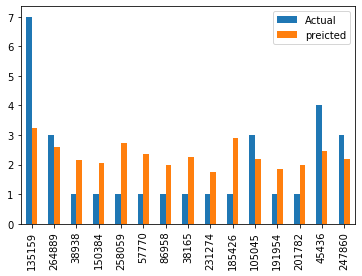

In [57]:
#visualizing the actual and predicted data
df=pd.DataFrame({'Actual':sample_target,'preicted':sample_predict})
df.plot(kind='bar')

In [58]:
#computing the RMSE for all the training data
from sklearn.metrics import mean_squared_error
pred=LR_model.predict(Processed_X_train)
mse=mean_squared_error(X_target,pred)
rmse=np.sqrt(mse)
print('RMSE of LinearRegression:',rmse)

RMSE of LinearRegression: 2.580901208547902


**2 DecisionTreeRegressor Model**

In [59]:
from sklearn.tree import DecisionTreeRegressor
Dtree_model=DecisionTreeRegressor(random_state=40)
Dtree_model.fit(Processed_X_train,X_target)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=40, splitter='best')

In [60]:
#performing prediction on sample data using DecisionTreeRegressor Model
sample_predict=Dtree_model.predict(sample)
sample_predict

array([7.        , 2.5       , 1.        , 1.        , 1.        ,
       3.25      , 1.        , 1.        , 1.        , 1.        ,
       2.33333333, 1.        , 1.        , 4.        , 4.33333333])

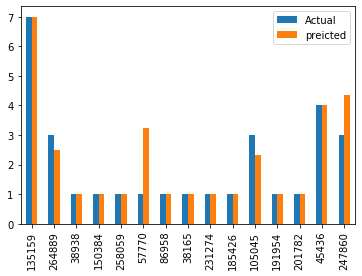

In [61]:
#visualizing the actual and predicted data
df=pd.DataFrame({'Actual':sample_target,'preicted':sample_predict})
df.plot(kind='bar')

In [62]:
pred=Dtree_model.predict(Processed_X_train)
mse=mean_squared_error(X_target,pred)
rmse=np.sqrt(mse)
print('RMSE of DecisionTreeRegressor model is:',rmse)

RMSE of DecisionTreeRegressor model is: 0.9578009389703717


**3 RandomForestRegressor Model**

In [63]:
from sklearn.ensemble import RandomForestRegressor
RForest_model=RandomForestRegressor(random_state=40,n_jobs=2)
RForest_model.fit(Processed_X_train,X_target)

C:\Users\Deepjyoti\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
                      oob_score=False, random_state=40, verbose=0,
                      warm_start=False)

In [64]:
#performing prediction on sample data using RandomForestRegressor Model
sample_predict=RForest_model.predict(sample)
sample_predict

array([6.5       , 2.33925866, 1.1       , 2.2       , 1.        ,
       3.27416667, 1.        , 1.        , 1.        , 1.        ,
       2.28      , 1.        , 1.        , 4.        , 4.20333333])

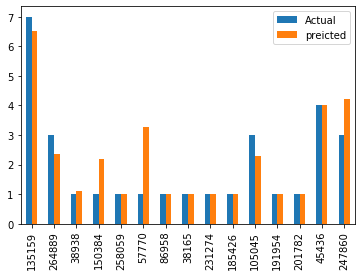

In [65]:
#visualizing the actual and predicted data
df=pd.DataFrame({'Actual':sample_target,'preicted':sample_predict})
df.plot(kind='bar')

In [66]:
pred=RForest_model.predict(Processed_X_train)
rmse=np.sqrt(mean_squared_error(X_target,pred))
print('RMSE of RandomForestRegressor model is:',rmse)

RMSE of RandomForestRegressor model is: 1.0504724958365774


From all the three models LinearRegression Model is having the largest RMSE 2.5808939173786443 ,RMSE of RandomForestRegressor model is: 1.018495098768923.The Lowest RMSE 0.9578009389703717 is for the DecisionTree model.

The LinearRegression model maybe underfitting clearly because as seen from the bar plot there is huge difference in predicted  and actual values.Where as the RandomForest and DecisionTree model are giving good results as seen in the bar plot.Thus we need to crossvalidate to see which model is overfitting and underfitting and to choose the best model finally.

**Creating a function to display scores**

In [67]:
def display_scores(scores):
    print('scores:',scores)
    print('Mean:',scores.mean())
    print('Standard_deviation:',scores.std())

**CrossValidation on Models**

In [68]:
from sklearn.model_selection import cross_val_score

#cvscore on LinearRegression Model
scores=cross_val_score(LR_model,Processed_X_train,X_target,cv=5,scoring='neg_mean_squared_error')
lin_rmse=np.sqrt(-scores)

In [69]:
#cvscore on DecisionTreeRegressor Model 
scores=cross_val_score(Dtree_model,Processed_X_train,X_target,cv=5,scoring='neg_mean_squared_error')
tree_rmse=np.sqrt(-scores)

In [70]:
#cvscore on RandomForestRegressor Model
scores=cross_val_score(RForest_model,Processed_X_train,X_target,cv=5,scoring='neg_mean_squared_error')
forest_rmse=np.sqrt(-scores)

Displaying the various Crossvalidation scores of the models

In [71]:
#crossvalidation scores of LinearRegression Model
display_scores(lin_rmse)

scores: [2.59057923 2.55138188 2.57212632 2.62994808 2.56230507]
Mean: 2.58126811644887
Standard_deviation: 0.027541938770157284


In [72]:
#crossvalidation scores of DecsisionTreeRegression Model
display_scores(tree_rmse)

scores: [1.79536394 1.78139093 1.82419221 1.81619246 1.78660365]
Mean: 1.8007486375119317
Standard_deviation: 0.016684778714097397


In [73]:
#crossvalidation scores of RandomForestRegressor Model
display_scores(forest_rmse)

scores: [1.61099408 1.58898262 1.61783528 1.6173779  1.58330622]
Mean: 1.6036992208147454
Standard_deviation: 0.014646516942960089


From all the scores I found that RandomForestRegressor Model is having best crossvalidation score.

# Fine Tuning the model

**1 Performing RandomizedSearchCV**

In [74]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs={'n_estimators':randint(low=10,high=50),
               'max_features': randint(low=30 ,high=41)}

rndsearch=RandomizedSearchCV(RForest_model,param_distribs,cv=5,n_iter=5 ,n_jobs=2,
                             scoring='neg_mean_squared_error',random_state=41)
rndsearch.fit(Processed_X_train,X_target)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=10, n_jobs=2,
                                                   oob_score=False,
                                                   random_state=40, v...

In [75]:
rndsearch.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=37, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=31, n_jobs=2,
                      oob_score=False, random_state=40, verbose=0,
                      warm_start=False)

In [76]:
rndsearch.best_params_

{'max_features': 37, 'n_estimators': 31}

In [77]:
r_result=rndsearch.cv_results_
for mean_score,para in zip(r_result['mean_test_score'],r_result['params']):
    print(np.sqrt(-mean_score),para)

1.591037422621416 {'max_features': 30, 'n_estimators': 45}
1.5901185784317033 {'max_features': 32, 'n_estimators': 26}
1.5855301403546105 {'max_features': 31, 'n_estimators': 35}
1.5787218351879737 {'max_features': 37, 'n_estimators': 31}
1.5945903795517047 {'max_features': 40, 'n_estimators': 13}


By doing RandomizedSearchCV I found that n_estimators=45,26,35,31,13  and maximum features should be 30,32,31,37,40 respectively gives best result.The best score is 1.1.5787218351879737 for max_features: 37 and n_estimators: 31

Now from above result we can narrow down our search for best parameters and estimators using GridSearchCV

**2 Performing GridSearchCV**

In [78]:
from sklearn.model_selection import GridSearchCV
param_grid1=[{'n_estimators':[31,33,35],'max_features':[35,37,40]}]

In [79]:
gridsearch=GridSearchCV(RForest_model,param_grid1,cv=5,n_jobs=2,scoring='neg_mean_squared_error')
gridsearch.fit(Processed_X_train,X_target)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=2,
                                             oob_score=False, random_state=40,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=2,
             param_grid=[{'max_features': [35, 37, 40],
            

In [80]:
gridsearch.best_params_

{'max_features': 40, 'n_estimators': 35}

In [81]:
gridsearch.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=40, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=35, n_jobs=2,
                      oob_score=False, random_state=40, verbose=0,
                      warm_start=False)

In [82]:
gscore=gridsearch.cv_results_
for mean_score,para in zip(gscore['mean_test_score'],gscore['params']):
    print(np.sqrt(-mean_score),para)

1.579582291917129 {'max_features': 35, 'n_estimators': 31}
1.5786433148507595 {'max_features': 35, 'n_estimators': 33}
1.5781277042867752 {'max_features': 35, 'n_estimators': 35}
1.5787218351879737 {'max_features': 37, 'n_estimators': 31}
1.5780710849578217 {'max_features': 37, 'n_estimators': 33}
1.577107577508271 {'max_features': 37, 'n_estimators': 35}
1.577907220055193 {'max_features': 40, 'n_estimators': 31}
1.5771269642886325 {'max_features': 40, 'n_estimators': 33}
1.5763823880754568 {'max_features': 40, 'n_estimators': 35}


In [83]:
#performing GridSearchCV for bootstrap = False
param_grid2={'bootstrap':[False],'n_estimators':[32,34,35],'max_features':[35,38,40]}
GridSearch=GridSearchCV(RForest_model,param_grid2,cv=5,n_jobs=2,scoring='neg_mean_squared_error')

In [84]:
GridSearch.fit(Processed_X_train,X_target)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=2,
                                             oob_score=False, random_state=40,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=2,
             param_grid={'bootstrap': [False], 'max_features': [35, 

In [85]:
GridSearch.best_params_

{'bootstrap': False, 'max_features': 35, 'n_estimators': 34}

In [86]:
GridSearch.best_estimator_

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
                      max_features=35, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=34, n_jobs=2,
                      oob_score=False, random_state=40, verbose=0,
                      warm_start=False)

In [87]:
GScore=GridSearch.cv_results_
for mean_score,para in zip(GScore['mean_test_score'],GScore['params']):
    print(np.sqrt(-mean_score),para)

1.6809610081783708 {'bootstrap': False, 'max_features': 35, 'n_estimators': 32}
1.6801894019045287 {'bootstrap': False, 'max_features': 35, 'n_estimators': 34}
1.6803980084362553 {'bootstrap': False, 'max_features': 35, 'n_estimators': 35}
1.6988455833928648 {'bootstrap': False, 'max_features': 38, 'n_estimators': 32}
1.6971596886148859 {'bootstrap': False, 'max_features': 38, 'n_estimators': 34}
1.6974002302199869 {'bootstrap': False, 'max_features': 38, 'n_estimators': 35}
1.7431814962050127 {'bootstrap': False, 'max_features': 40, 'n_estimators': 32}
1.7433771107100513 {'bootstrap': False, 'max_features': 40, 'n_estimators': 34}
1.7434013252788 {'bootstrap': False, 'max_features': 40, 'n_estimators': 35}


From GridSearchCV I found that bootstrap=True is yeilding better results than bootstrap = False. The GridSearchCV  for bootstrap = True is giving best score of 1.5763823880754568 for 'max_features': 40, 'n_estimators': 35 ,whereas GridSearchCV for bootstrap = False the best score is 1.6801894019045287 for 'bootstrap': False, 'max_features': 35, 'n_estimators': 34 . 
Thus it is clear that boostrap=True is giving better results.

# Evaluate the model on final data 

In [88]:
Test_set

,CustomerId,OrderDate,SalesOrderNumber,TerritoryID,ProductID,UnitPrice,OrderQty,year,month,week_day,week_of_month,Season,is_holiday,Product_cat
29510,29689,2015-05-24,SO51123,1,711,15.7455,7,2015,May,6,4.0,SPRING,0,Category_1
214120,19130,2015-09-28,SO466509,4,882,53.9900,1,2015,September,0,4.0,FALL,0,Category_8
187736,19879,2015-07-29,SO462888,4,966,2384.0701,1,2015,July,2,5.0,SUMMER,0,Category_4
221080,11273,2015-10-17,SO184352,4,712,8.9900,1,2015,October,5,3.0,FALL,0,Category_1
264026,29513,2015-03-24,SO50231,5,767,469.7940,1,2015,March,1,4.0,SPRING,0,Category_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148517,30106,2014-10-24,SO79810,4,764,782.9900,1,2014,October,4,4.0,FALL,0,Category_3
128041,11945,2014-03-24,SO203437,4,762,234.8970,4,2014,March,0,4.0,SPRING,0,Catgeory_2
58459,12930,2015-09-16,SO88102,1,909,23.4840,10,2015,September,2,3.0,FALL,0,Category_6
139782,13400,2014-07-22,SO267579,4,707,34.9900,1,2014,July,1,4.0,SUMMER,0,Category_1


In [89]:
Y_target=Test_set['OrderQty']

In [90]:
Test_set.drop(['CustomerId' ,'OrderDate','SalesOrderNumber','ProductID','OrderQty'] ,axis=1 ,inplace=True)
Test_set.head()

,TerritoryID,UnitPrice,year,month,week_day,week_of_month,Season,is_holiday,Product_cat
29510,1,15.7455,2015,May,6,4.0,SPRING,0,Category_1
214120,4,53.9900,2015,September,0,4.0,FALL,0,Category_8
187736,4,2384.0701,2015,July,2,5.0,SUMMER,0,Category_4
221080,4,8.9900,2015,October,5,3.0,FALL,0,Category_1
264026,5,469.7940,2015,March,1,4.0,SPRING,0,Category_5


In [91]:
test_processed=pipeline.transform(Test_set).toarray()

In [92]:
test_processed

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.61699756],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.        , -0.5656638 ],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.        ,  2.56189152],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.60661055],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.        , -0.59116659],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.6247229 ]])

In [93]:
test_processed.shape

(81246, 41)

In [94]:
final_rmodel=rndsearch.best_estimator_
Y_pred=final_rmodel.predict(test_processed)

In [95]:
final_model=gridsearch.best_estimator_
Pred_Target=final_model.predict(test_processed)

In [96]:
RMSE=np.sqrt(mean_squared_error(Y_target,Y_pred))
print('The RMSE of the Random Forest Model using RandomizedSearchCV is:',RMSE)

The RMSE of the Random Forest Model using RandomizedSearchCV is: 1.5653147552217777


In [97]:
RMSE=np.sqrt(mean_squared_error(Y_target,Pred_Target))
print('The RMSE of the Random Forest Model using GridSearchCV is:',RMSE)

The RMSE of the Random Forest Model using GridSearchCV is: 1.5650069756179146


Both the models are having almost same RMSE on the test data.